In [ ]:
# Descriptive Satatistics Data Analysis

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/naukri_com-job_sample.csv')

In [ ]:
df.head(3)

,company,education,industry,jobdescription,jobid,joblocation_address,jobtitle,numberofpositions,site_name,skills,min_pay,max_pay,min_exp,max_exp,avg_exp,avg_pay,day,month,year
0,MM Media Pvt Ltd,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,Media / Entertainment / Internet,Job Description Send me Jobs like this Quali...,210516002263,Chennai,Walkin Data Entry Operator (night Shift),NaN,NaN,ITES,150000.0,225000.0,0.0,1.0,0.5,187500.0,21.0,5.0,2016.0
1,find live infotech,UG: B.Tech/B.E. - Any Specialization PG:MBA/PG...,Advertising / PR / MR / Event Management,Job Description Send me Jobs like this Quali...,210516002391,Chennai,Work Based Onhome Based Part Time.,60.0,NaN,Marketing,150000.0,250000.0,0.0,0.0,0.0,200000.0,21.0,5.0,2016.0
2,Softtech Career Infosystem Pvt. Ltd,UG: Any Graduate - Any Specialization PG:Any P...,IT-Software / Software Services,Job Description Send me Jobs like this - as ...,101016900534,Banglore,Pl/sql Developer - SQL,NaN,NaN,IT Software - Application Programming,NaN,NaN,4.0,8.0,6.0,NaN,13.0,10.0,2016.0


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
jobid,22000.0,1.561171e+11,9.423956e+10,1.011600e+10,6.121650e+10,1.602169e+11,2.502166e+11,3.112155e+11
numberofpositions,4464.0,4.511694e+01,1.861972e+02,1.000000e+00,2.000000e+00,4.000000e+00,1.000000e+01,2.000000e+03
min_pay,4641.0,4.493986e+05,5.509237e+05,1.500000e+01,1.500000e+05,2.500000e+05,5.000000e+05,5.500000e+06
max_pay,4940.0,7.342964e+05,7.559780e+05,1.000000e+00,3.000000e+05,5.000000e+05,9.000000e+05,8.000000e+06
min_exp,21884.0,3.600987e+00,3.100532e+00,0.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00,2.600000e+01
max_exp,21884.0,7.117803e+00,3.923900e+00,0.000000e+00,5.000000e+00,7.000000e+00,9.000000e+00,3.000000e+01
avg_exp,21884.0,5.359395e+00,3.444409e+00,0.000000e+00,3.000000e+00,4.500000e+00,7.000000e+00,2.800000e+01
avg_pay,4640.0,6.149812e+05,6.442135e+05,1.750000e+01,2.500000e+05,3.750000e+05,7.500000e+05,6.500000e+06
day,21977.0,1.884993e+01,9.751744e+00,1.000000e+00,9.000000e+00,2.200000e+01,2.900000e+01,3.100000e+01
month,21977.0,7.224189e+00,4.062145e+00,1.000000e+00,3.000000e+00,8.000000e+00,1.100000e+01,1.200000e+01


In [ ]:
#Describe data with respect to categorical values
df.describe(include=['O']).T

,count,unique,top,freq
company,21996,8469,Indian Institute of Technology Bombay,403
education,20004,2355,"UG: Any Graduate - Any Specialization, Graduat...",2015
industry,21995,63,IT-Software / Software Services,9216
jobdescription,21996,21063,Job Description Send me Jobs like this Adver...,121
joblocation_address,21499,2171,Banglore/Bangalore,3775
jobtitle,22000,17564,Business Development Executive,93
site_name,3987,1,www.naukri.com,3987
skills,21472,45,IT Software - Application Programming,5989


In [ ]:
# We will perform categorical & Numerical feature analysis
# We will perform Bivariant analysis
# We will find out the feature which is categorical in nature & Numerical in nature
# It can be done by-
#1. list comprehension
#2. Dict
#3. Filter & enumeration
#4. Inbuilt function


In [ ]:
#1. List comprehension
# Fetch categorical value
categorical=[col for col in df.columns if df[col].dtypes=='object']

In [ ]:
categorical

['company',
 'education',
 'industry',
 'jobdescription',
 'joblocation_address',
 'jobtitle',
 'site_name',
 'skills']

In [ ]:
# Fetch Numeical  value
numerical=[col for col in df.columns if df[col].dtypes!='object']

In [ ]:
numerical

['jobid',
 'numberofpositions',
 'min_pay',
 'max_pay',
 'min_exp',
 'max_exp',
 'avg_exp',
 'avg_pay',
 'day',
 'month',
 'year']

In [ ]:
 # We will find out the correlation
 df.corr()

,jobid,numberofpositions,min_pay,max_pay,min_exp,max_exp,avg_exp,avg_pay,day,month,year
jobid,1.000000,-0.041356,-0.010856,-0.009570,0.025795,0.023397,0.024937,-0.008172,0.568167,-0.256826,0.091035
numberofpositions,-0.041356,1.000000,-0.121553,-0.148161,-0.194685,-0.212955,-0.208745,-0.138778,-0.019797,-0.072022,0.047774
min_pay,-0.010856,-0.121553,1.000000,0.938850,0.709683,0.677629,0.704354,0.979315,-0.009659,-0.025859,0.057210
max_pay,-0.009570,-0.148161,0.938850,1.000000,0.612399,0.624441,0.630134,0.989101,-0.005154,-0.002053,0.038748
min_exp,0.025795,-0.194685,0.709683,0.612399,1.000000,0.922456,0.975517,0.716731,-0.013617,-0.037447,0.094205
max_exp,0.023397,-0.212955,0.677629,0.624441,0.922456,1.000000,0.984785,0.701668,-0.024664,-0.027442,0.088948
avg_exp,0.024937,-0.208745,0.704354,0.630134,0.975517,0.984785,1.000000,0.721296,-0.020177,-0.032485,0.093065
avg_pay,-0.008172,-0.138778,0.979315,0.989101,0.716731,0.701668,0.721296,1.000000,-0.002908,-0.022663,0.059608
day,0.568167,-0.019797,-0.009659,-0.005154,-0.013617,-0.024664,-0.020177,-0.002908,1.000000,-0.013063,-0.372578
month,-0.256826,-0.072022,-0.025859,-0.002053,-0.037447,-0.027442,-0.032485,-0.022663,-0.013063,1.000000,-0.598949


Text(0.5, 1.0, 'Heatmap of Job Market Analysis of India')

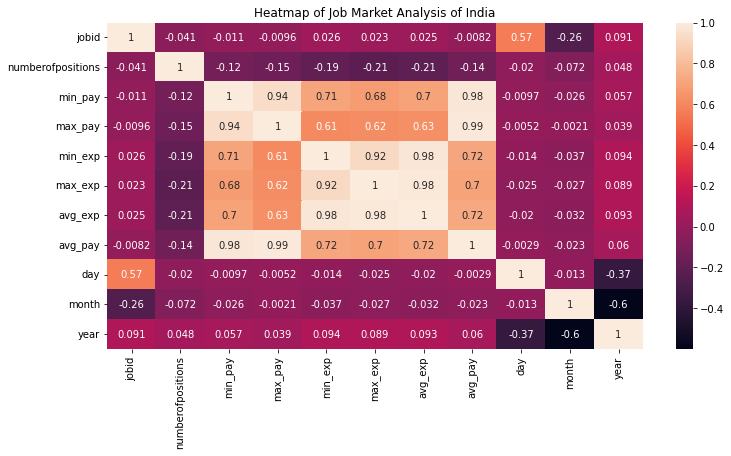

In [ ]:
 plt.figure(figsize=(12,6))
 sns.heatmap(df.corr(),annot=True)
 plt.title('Heatmap of Job Market Analysis of India')

**Observation 
The lighter the color more the correlation, the brighter the color the lesser correlation
1. As we can see the min payrate increases their is a probability that max pay rate also increases i.e by 94%
2. Similarly if min exp increases their is 70% probability that min pay will also increase **


In [ ]:
 df.corr()['min_pay']

jobid               -0.010856
numberofpositions   -0.121553
min_pay              1.000000
max_pay              0.938850
min_exp              0.709683
max_exp              0.677629
avg_exp              0.704354
avg_pay              0.979315
day                 -0.009659
month               -0.025859
year                 0.057210
Name: min_pay, dtype: float64

**Observation--
As we can see their is 93% probability if min pay increases max pay also increases**

In [ ]:
# Now we will analyse the data i.e, No of job position in each company

data=df.copy()

In [ ]:
data.columns

Index(['company', 'education', 'industry', 'jobdescription', 'jobid',
       'joblocation_address', 'jobtitle', 'numberofpositions', 'site_name',
       'skills', 'min_pay', 'max_pay', 'min_exp', 'max_exp', 'avg_exp',
       'avg_pay', 'day', 'month', 'year'],
      dtype='object')

In [ ]:
data['company']

0                                        MM Media Pvt Ltd
1                                      find live infotech
2                     Softtech Career Infosystem Pvt. Ltd
3                                  Onboard HRServices LLP
4              Spire Technologies and Solutions Pvt. Ltd.
                               ...                       
21995         Morgan Stanley Advantage Services Pvt. Ltd.
21996    Careernet Technologies Pvt Ltd hiring for Client
21997                                      Musk - Startup
21998                                        Confidential
21999                     Cambio Consulting India Pvt Ltd
Name: company, Length: 22000, dtype: object

In [ ]:
comp=data['company'].value_counts().reset_index()
comp

,index,company
0,Indian Institute of Technology Bombay,403
1,Confidential,393
2,National Institute of Industrial Engineering,185
3,Oracle India Pvt. Ltd.,151
4,JPMorgan Chase,135
...,...,...
8464,Bello Jewels Pvt Ltd,1
8465,ITG Telematics Pvt Ltd,1
8466,Genuine Management Services Pvt. Limited hirin...,1
8467,AJAX Consulting hiring for a large Japanese MNC,1


In [ ]:
comp.columns=['company','Number of Jobs']

In [ ]:
# Top 10 companies with max no of job vacancy
comp[0:10]

,company,Number of Jobs
0,Indian Institute of Technology Bombay,403
1,Confidential,393
2,National Institute of Industrial Engineering,185
3,Oracle India Pvt. Ltd.,151
4,JPMorgan Chase,135
5,Godrej Industries Ltd,125
6,Unitforce technologies Pvt. Ltd.,100
7,Capgemini,98
8,HCL Technologies,95
9,Axis Jobs,92


Text(0.5, 1.0, 'Top 10 company with max no of job posting')

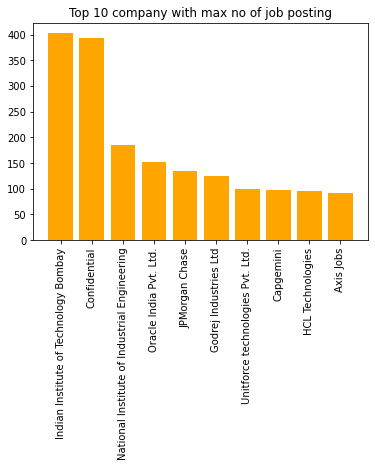

In [ ]:
 #Plot bar chart on the basis of X axis=companyname and Y axis=vacancy

 plt.bar(comp['company'][0:10],comp['Number of Jobs'][0:10],color='orange')
 plt.xticks(rotation='vertical')
 plt.title('Top 10 company with max no of job posting')

(array([], dtype=float64), <a list of 0 Text major ticklabel objects>)

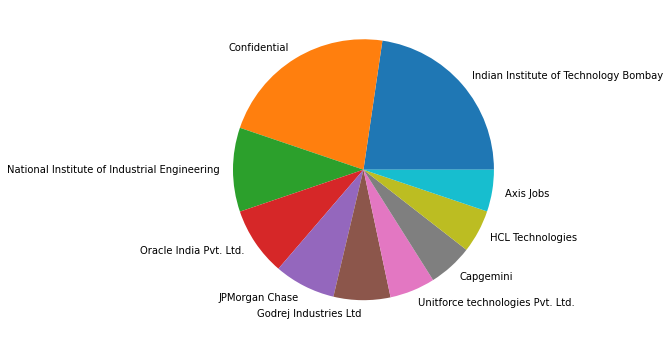

In [ ]:
#Now we will create a piechart
plt.figure(figsize=(12,6))
plt.pie(labels=comp['company'][0:10],x=comp['Number of Jobs'][0:10])
plt.xticks(rotation='vertical')

In [ ]:
# Now we will automate the data where we can easily see different graph in single click

# We have to define the function to avoid the repetation 

# This will return us plots depending upon what chart we want
  # Parameters------------
  # data= dataframe
  # feature:column_name that we have to consider for analysis
  # col1: First column name that u want to assign for new df
  # col2: Second column name that u want to assign for new df
  # chart==1 then bar chart
  # char==2 then pie chart

def perform_analysis(data,feature,col1,col2,chart=1):
  dataframe=data[feature].value_counts().reset_index()
  dataframe.columns=[col1,col2]

  print(dataframe.head(5))

  if chart==1:
    plt.bar(dataframe[col1][0:10],dataframe[col2][0:10],color='lightgreen')
    plt.xticks(rotation='vertical')
    plt.figure(figsize=(12,6))
  
  elif(chart==2):
    plt.pie(labels=dataframe[col1][0:10],x=dataframe[col2][0:10])
    plt.figure(figsize=(12,6))
    


In [ ]:
print(perform_analysis.__doc__)

None


                                        company  Number of Jobs
0         Indian Institute of Technology Bombay             403
1                                  Confidential             393
2  National Institute of Industrial Engineering             185
3                        Oracle India Pvt. Ltd.             151
4                                JPMorgan Chase             135


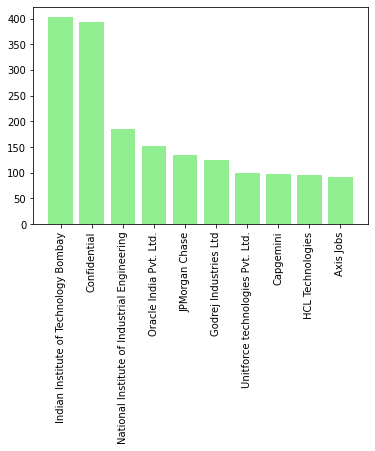

<Figure size 864x432 with 0 Axes>

In [ ]:
perform_analysis(data,'company','company','Number of Jobs')

                                        company  Number of Jobs
0         Indian Institute of Technology Bombay             403
1                                  Confidential             393
2  National Institute of Industrial Engineering             185
3                        Oracle India Pvt. Ltd.             151
4                                JPMorgan Chase             135


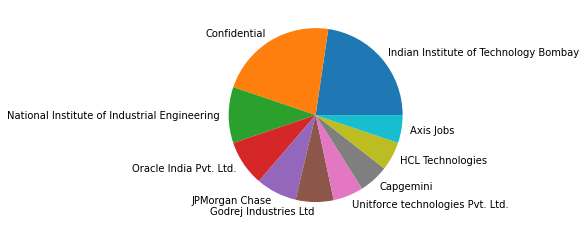

<Figure size 864x432 with 0 Axes>

In [ ]:
perform_analysis(data,'company','company','Number of Jobs',2)

In [ ]:
# How to make your code more readable- vedio- 16
#print(pd.read_csv.__doc__)

In [ ]:
# Perform Industry based analysis
# Job title Analysis
# Skills analysis
# Job location Analysis 

data.columns

Index(['company', 'education', 'industry', 'jobdescription', 'jobid',
       'joblocation_address', 'jobtitle', 'numberofpositions', 'site_name',
       'skills', 'min_pay', 'max_pay', 'min_exp', 'max_exp', 'avg_exp',
       'avg_pay', 'day', 'month', 'year'],
      dtype='object')

                               industries  No of jobs
0         IT-Software / Software Services        9216
1         Education / Teaching / Training        1322
2                BPO / Call Centre / ITES        1254
3  Banking / Financial Services / Broking        1238
4                  Recruitment / Staffing        1129


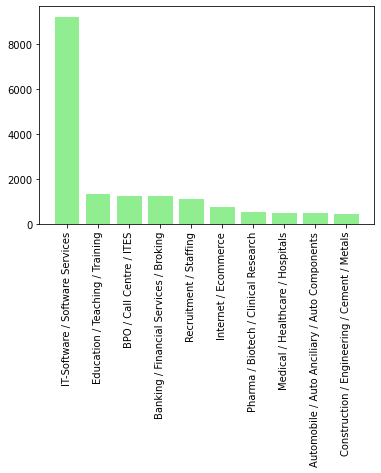

<Figure size 864x432 with 0 Axes>

In [ ]:
# Industry and No of Jobs analysis
perform_analysis(data,'industry','industries','No of jobs')

                               industries  No of jobs
0         IT-Software / Software Services        9216
1         Education / Teaching / Training        1322
2                BPO / Call Centre / ITES        1254
3  Banking / Financial Services / Broking        1238
4                  Recruitment / Staffing        1129


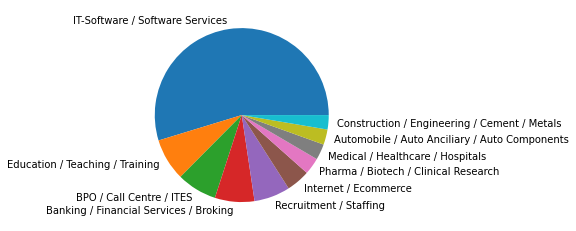

<Figure size 864x432 with 0 Axes>

In [ ]:
perform_analysis(data,'industry','industries','No of jobs',2)

                         Jobtitle  No of jobs
0  Business Development Executive          93
1    Business Development Manager          92
2               Software Engineer          81
3                 Project Manager          67
4               Android Developer          65


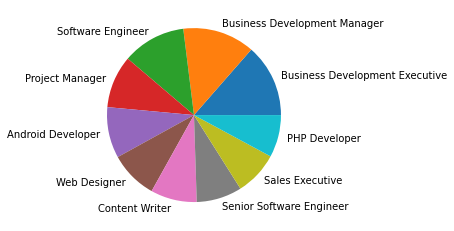

<Figure size 864x432 with 0 Axes>

In [ ]:
perform_analysis(data,'jobtitle','Jobtitle','No of jobs',2)

                                  Skills  Counts
0  IT Software - Application Programming    5989
1                                  Sales    2893
2                                   ITES    1640
3                               Teaching    1091
4                                     HR     928


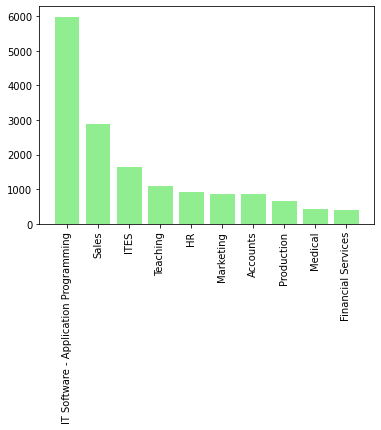

<Figure size 864x432 with 0 Axes>

In [ ]:
# Skills and its count
perform_analysis(data,'skills','Skills','Counts')

               Cities  No of Jobs
0  Banglore/Bangalore        3775
1               Delhi        2385
2              Mumbai        2373
3           Hyderabad        2182
4            Banglore        1453


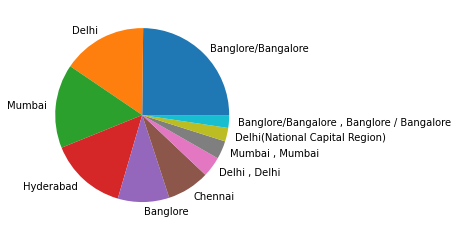

<Figure size 864x432 with 0 Axes>

In [ ]:
# Cities and Job counts
perform_analysis(data,'joblocation_address','Cities','No of Jobs',2)